In [1]:
import os
os.chdir("../../")

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
data_name = 'pancreas'
data_type = "normalized"

# Scratch scNet

In [23]:
trVAE_scores = pd.read_csv(f"./results/subsample/{data_name}/scores_trVAE.csv")
trVAE_scores['Architecture'] = 'trVAE'

# Freeze Level=0 scores

In [17]:
freezed0_scnet_scores = pd.read_csv(f"./results/subsample/{data_name}/scores_scNet_freeze_level=0.csv")
freezed0_scnet_scores['Architecture'] = 'scNet v1'

# Freeze Level=1 scores

In [25]:
freezed1_scnet_scores = pd.read_csv(f"./results/subsample/{data_name}/scores_scNet_freeze_level=1.csv")
freezed1_scnet_scores['Architecture'] = 'scNet v2'

# Freeze Level=2 scores

In [26]:
freezed2_scnet_scores = pd.read_csv(f"./results/subsample/{data_name}/scores_scNet_freeze_level=2.csv")
freezed2_scnet_scores['Architecture'] = 'scNet' 

# scVI scores

In [27]:
scvi_scores = []
for frac_number in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
    df = pd.DataFrame([pd.read_csv(f"./results/subsample/{data_name}/scVI_frac={frac_number}-{i}.csv").iloc[-1, :] for i in range(5)])
    df['subsample fraction'] = frac_number
    df.drop(['Epoch', 'Elapsed Time'], axis=1, inplace=True)
    scvi_scores.append(df)
scvi_scores = pd.concat(scvi_scores)

In [28]:
scvi_scores['Architecture'] = 'scVI'
scvi_scores['KNN'] = scvi_scores['KNN_15']
scvi_scores['EBM'] = scvi_scores['EBM_15']

In [29]:
scvi_scores = scvi_scores[['EBM', 'KNN', 'subsample fraction', 'Architecture']]

# Conos Scores

In [30]:
ks = [15, 25, 50, 100, 200, 300]

In [31]:
columns = ['subsample fraction', 'ASW', 'ARI', 'NMI'] + [f'EBM_{k}' for k in ks] + [f'KNN_{k}' for k in ks]

In [32]:
conos_scores_df = [pd.read_csv(f"./results/subsample/Conos/{data_name}/{i}.log", header=None) for i in range(5)]
conos_scores_df = pd.concat(conos_scores_df)

In [33]:
conos_scores_df.columns = columns

In [34]:
conos_scores_df['Architecture'] = 'Conos'
conos_scores_df['KNN'] = conos_scores_df['KNN_15']
conos_scores_df['EBM'] = conos_scores_df['EBM_15']

# Seurat scores

In [35]:
columns = ['subsample fraction', 'ASW', 'ARI', 'NMI'] + [f'EBM_{k}' for k in ks] + [f'KNN_{k}' for k in ks]

In [36]:
seurat_scores_df = [pd.read_csv(f"./results/subsample/Seurat/{data_name}/{i}.log", header=None) for i in range(5)]
seurat_scores_df = pd.concat(seurat_scores_df)

In [37]:
seurat_scores_df.columns = columns

In [38]:
seurat_scores = seurat_scores_df

In [39]:
seurat_scores['Architecture'] = 'Seurat'
seurat_scores['KNN'] = seurat_scores['KNN_15']
seurat_scores['EBM'] = seurat_scores['EBM_15']

# MNNCorrect

In [40]:
mnn_scores_df = [pd.read_csv(f"./results/subsample/mnnCorrect/{data_name}/{i}.log", header=None) for i in range(5)]
mnn_scores_df = pd.concat(mnn_scores_df)

In [41]:
mnn_scores_df.columns = columns

In [42]:
mnn_scores = mnn_scores_df

In [43]:
mnn_scores['Architecture'] = 'MNN Correct'
mnn_scores['KNN'] = mnn_scores['KNN_15']
mnn_scores['EBM'] = mnn_scores['EBM_15']

# Liger

In [44]:
liger_scores_df = [pd.read_csv(f"./results/subsample/Liger/{data_name}/{i}.log", header=None) for i in range(5)]
liger_scores_df = pd.concat(liger_scores_df)

In [45]:
liger_scores_df.columns = columns

In [46]:
liger_scores = liger_scores_df

In [47]:
liger_scores['Architecture'] = 'Liger'
liger_scores['KNN'] = liger_scores['KNN_15']
liger_scores['EBM'] = liger_scores['EBM_15']

# Harmony

In [48]:
harmony_scores_df = [pd.read_csv(f"./results/subsample/Harmony/{data_name}/{i}.log", header=None) for i in range(5)]
harmony_scores_df = pd.concat(harmony_scores_df)

In [49]:
harmony_scores_df.columns = columns

In [50]:
harmony_scores = harmony_scores_df

In [51]:
harmony_scores['Architecture'] = 'Harmony'
harmony_scores['KNN'] = harmony_scores['KNN_15']
harmony_scores['EBM'] = harmony_scores['EBM_15']

# Scanorama

In [52]:
scanorama_scores_df = [pd.read_csv(f"./results/subsample/Scanorama/{data_name}/{i}.log", header=None) for i in range(5)]
scanorama_scores_df = pd.concat(scanorama_scores_df)

In [53]:
scanorama_scores_df.columns = columns

In [54]:
scanorama_scores = scanorama_scores_df

In [55]:
scanorama_scores['Architecture'] = 'Scanorama'
scanorama_scores['KNN'] = scanorama_scores['KNN_15']
scanorama_scores['EBM'] = scanorama_scores['EBM_15']

# Integrating results

In [56]:
results_df = pd.concat([trVAE_scores, freezed0_scnet_scores, freezed1_scnet_scores, freezed2_scnet_scores, scvi_scores, mnn_scores, seurat_scores, scanorama_scores, liger_scores, harmony_scores, conos_scores_df])

/home/mohsen/anaconda3/envs/mohsen/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


# Additional  Metrics

In [57]:
results_df['EBM+KNN'] = results_df['EBM'] + results_df['KNN']

# Subsampling Plot

In [58]:
plot_columns = ["EBM", "KNN", "EBM+KNN"]

In [59]:
sns.set(style='white')

In [60]:
import matplotlib
font = {'family' : 'Arial',
        'size'   : 22}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=32)
matplotlib.rc('xtick', labelsize=32)

In [61]:
n_samples = 5387 if data_name == 'pancreas' else 15250

In [62]:
results_df['subsample_number'] = results_df['subsample fraction'] * n_samples
results_df['subsample_number'] = results_df['subsample_number'].astype('int32')

In [63]:
results_df_cmpr = results_df[~results_df['Architecture'].isin(['scNet v1', 'scNet v2'])]

<Figure size 864x720 with 0 Axes>

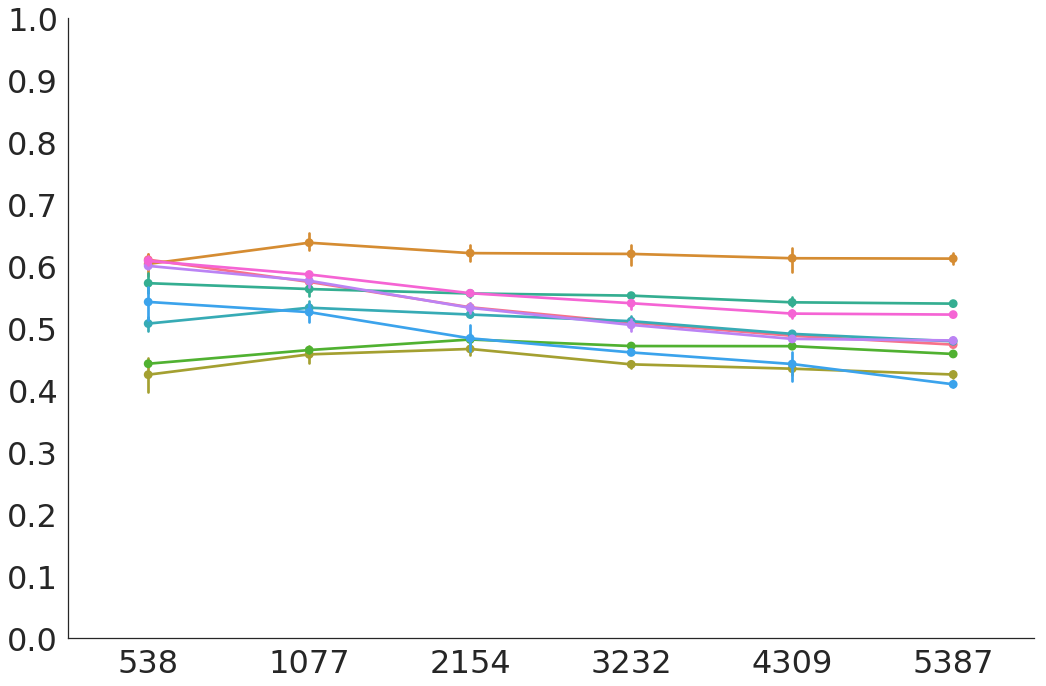

<Figure size 864x720 with 0 Axes>

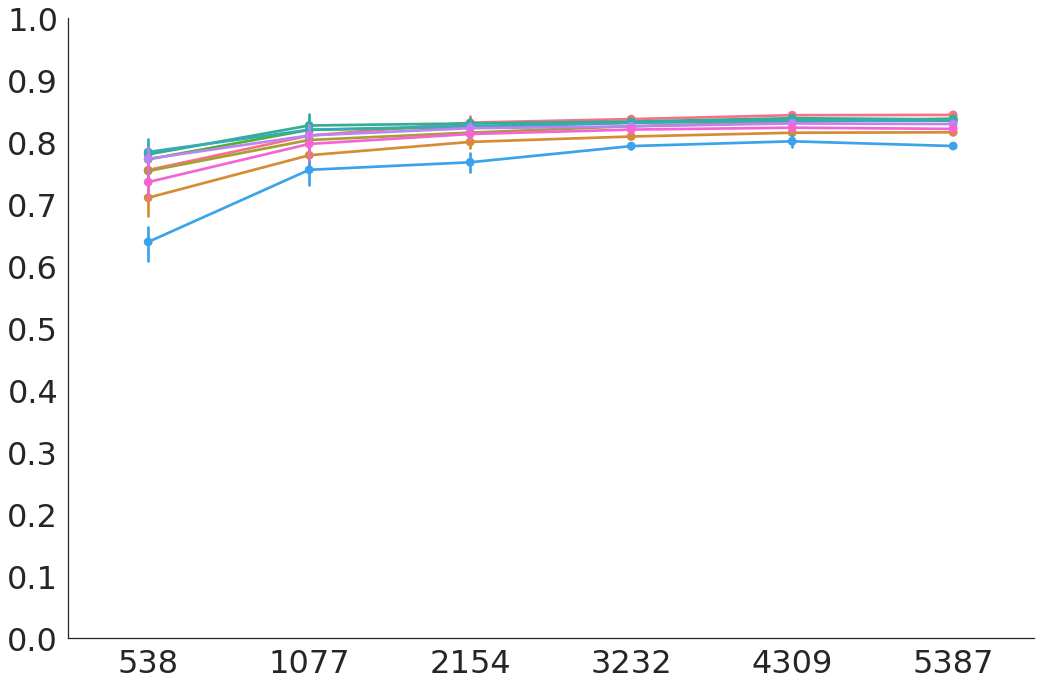

<Figure size 864x720 with 0 Axes>

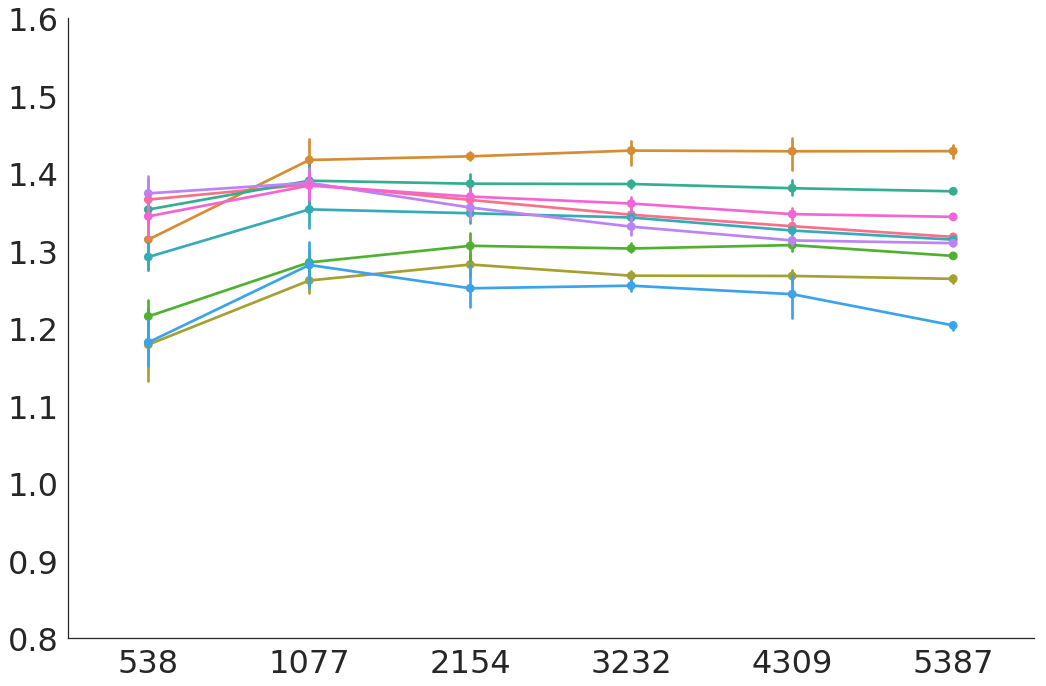

In [68]:
for idx, score in enumerate(plot_columns):
    plt.close("all")
    plt.figure(figsize=(12, 10))
    g = sns.catplot(x="subsample_number", y=score, hue="Architecture", kind="point", 
                    data=results_df_cmpr, legend=False,
                    height=10, aspect=1.5, palette=sns.color_palette("husl", 9))
    plt.xlabel('', fontsize=22)
    plt.ylabel("", fontsize=22)
    if score in ['EBM', 'KNN', 'HarmonicMean']:
        plt.ylim(0, 1)
        plt.yticks(np.arange(0, 1.1, 0.1))
    else:
        plt.ylim(0.8, 1.6)
        plt.yticks(np.arange(0.8, 1.7, 0.1))
#     plt.title(score)
#     if idx == 0:
#         plt.legend(bbox_to_anchor=(1.05,0.5), borderaxespad=0, loc='center left', prop={'size': 18})
    plt.tight_layout()
    os.makedirs(f"./results/subsample/{data_name}/pointplot/", exist_ok=True)
    plt.savefig(f"./results/subsample/{data_name}/pointplot/{score}.pdf", dpi=300)
    plt.show()
# plt.savefig("./results/subsample/toy/scNet.pdf")
# plt.ylim(0.0, 0.5)

In [65]:
scNet_results_df = results_df[results_df['Architecture'].isin(['scNet', 'scNet v1', 'scNet v2'])]

<Figure size 864x720 with 0 Axes>

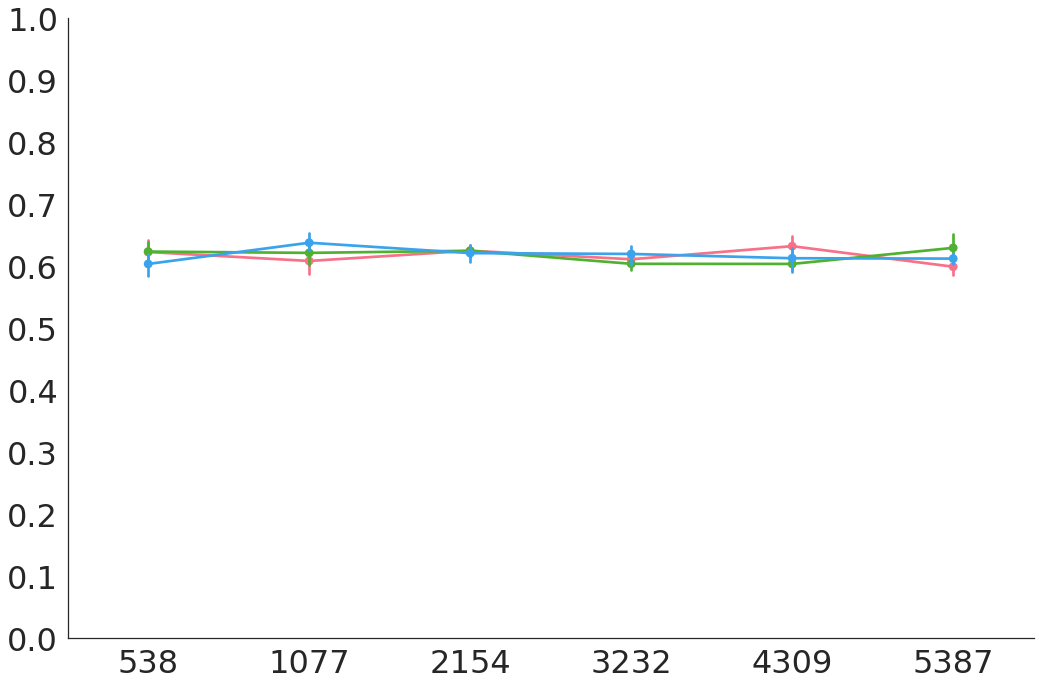

<Figure size 864x720 with 0 Axes>

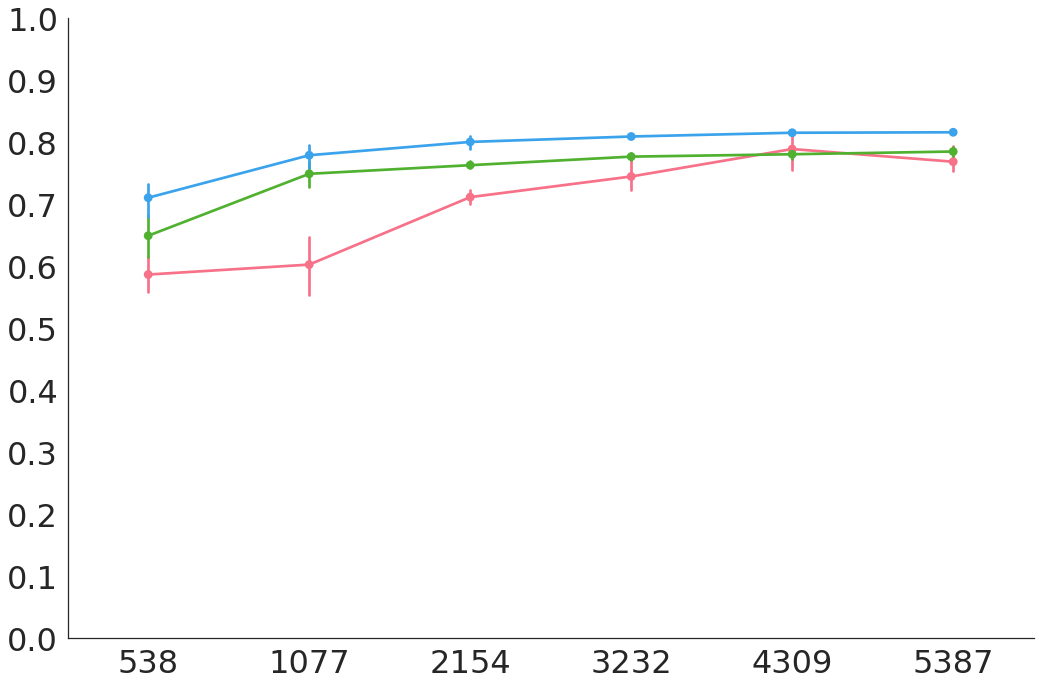

<Figure size 864x720 with 0 Axes>

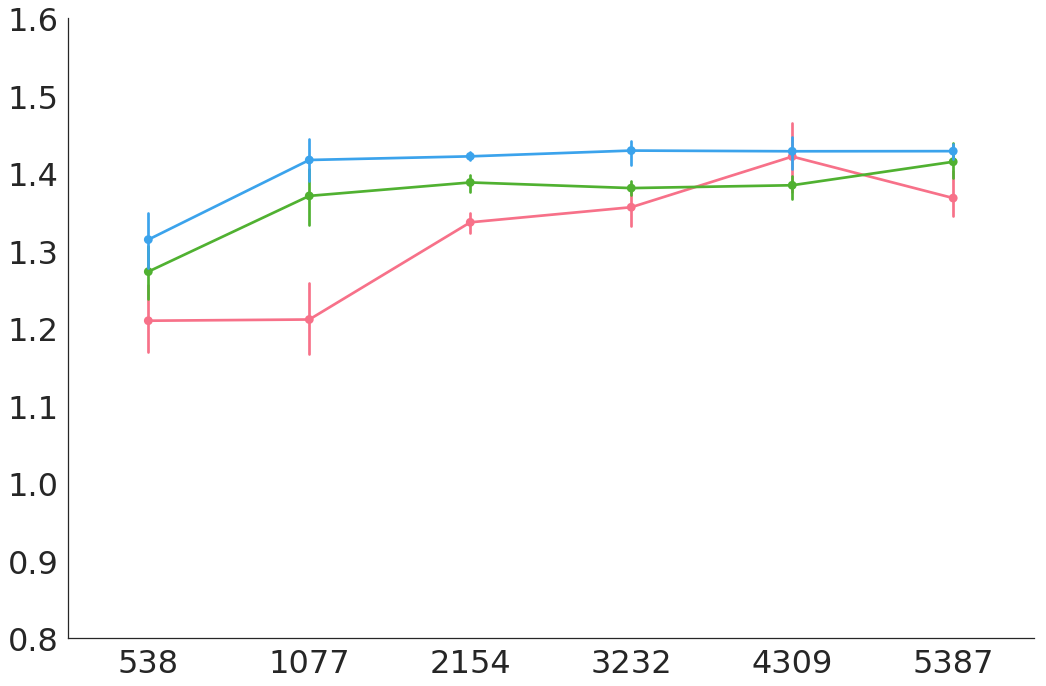

In [67]:
for idx, score in enumerate(plot_columns):
    plt.close("all")
    plt.figure(figsize=(12, 10))
    g = sns.catplot(x="subsample_number", y=score, hue="Architecture", kind="point", 
                    data=scNet_results_df, legend=False,
                    height=10, aspect=1.5, palette=sns.color_palette("husl", 3))
    plt.xlabel('', fontsize=22)
    plt.ylabel("", fontsize=22)
    if score in ['EBM', 'KNN', 'HarmonicMean']:
        plt.ylim(0, 1)
        plt.yticks(np.arange(0, 1.1, 0.1))
    else:
        plt.ylim(0.8, 1.6)
        plt.yticks(np.arange(0.8, 1.7, 0.1))
#     plt.title(score)
#     if idx == 0:
#         plt.legend(bbox_to_anchor=(1.05,0.5), borderaxespad=0, loc='center left', prop={'size': 18})
    plt.tight_layout()
    os.makedirs(f"./results/subsample/{data_name}/pointplot/", exist_ok=True)
    plt.savefig(f"./results/subsample/{data_name}/pointplot/{score}_scNet_comparison.pdf", dpi=300)
    plt.show()
# plt.savefig("./results/subsample/toy/scNet.pdf")
# plt.ylim(0.0, 0.5)

# Scatter (EBM vs. KNN)

In [69]:
sns.set(style='whitegrid')
import matplotlib
font = {'family' : 'Arial',
        'size'   : 22}

matplotlib.rc('font', **font)
matplotlib.rc('ytick', labelsize=32)
matplotlib.rc('xtick', labelsize=32)

0.1


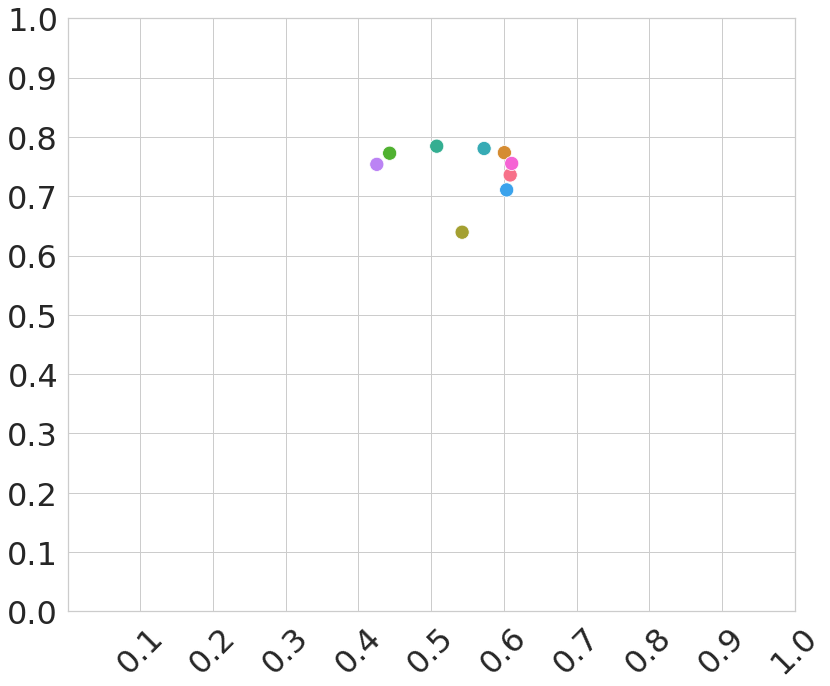

0.2


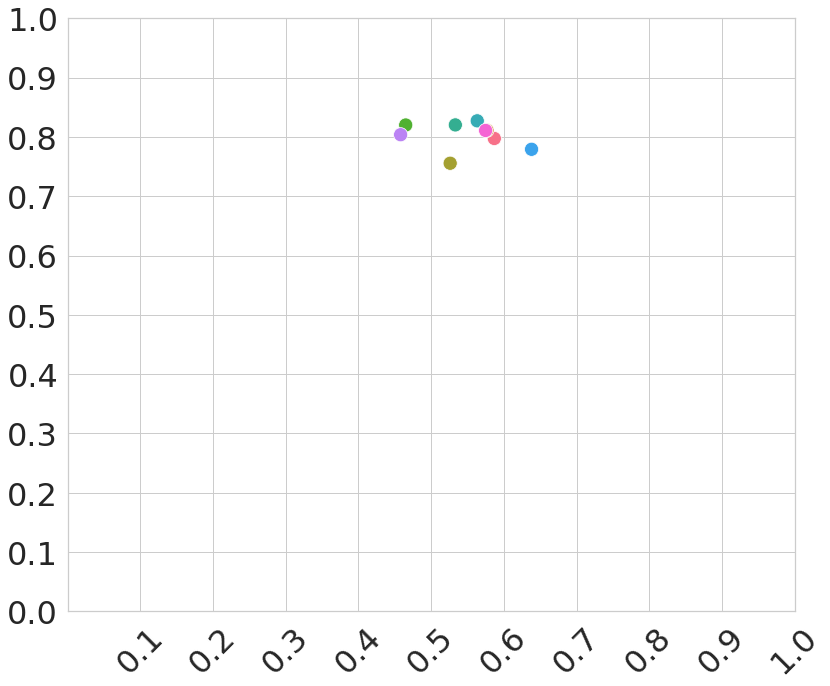

0.4


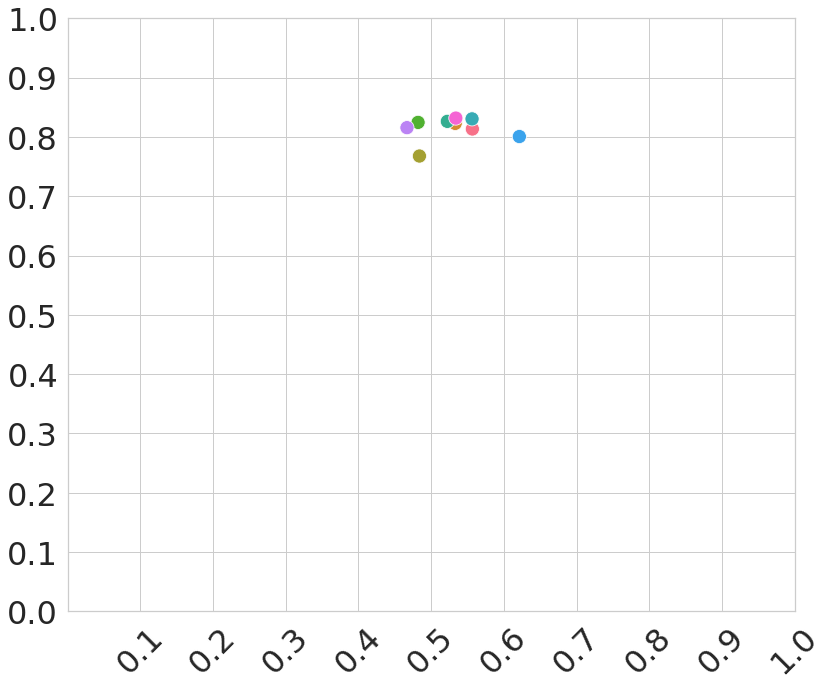

0.8


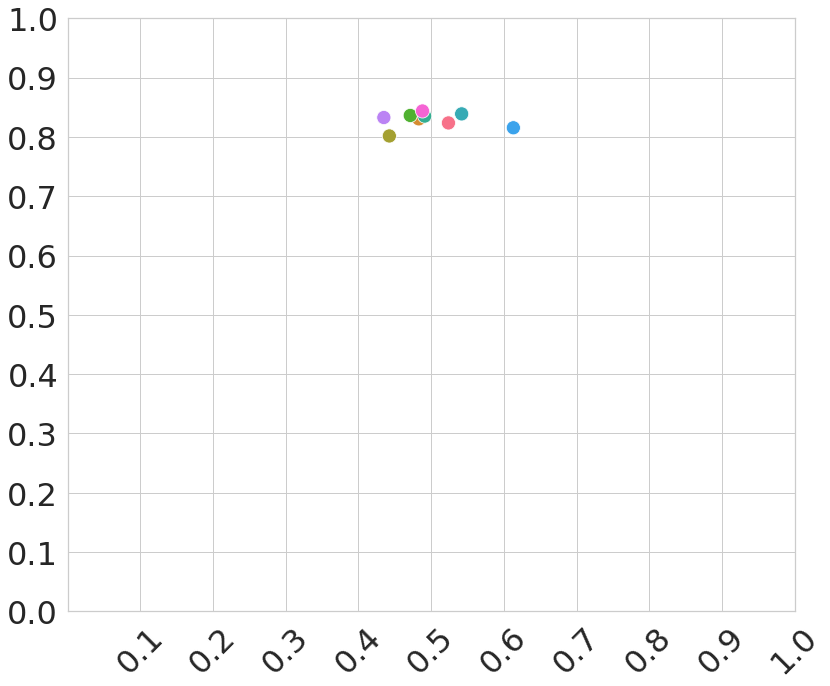

1.0


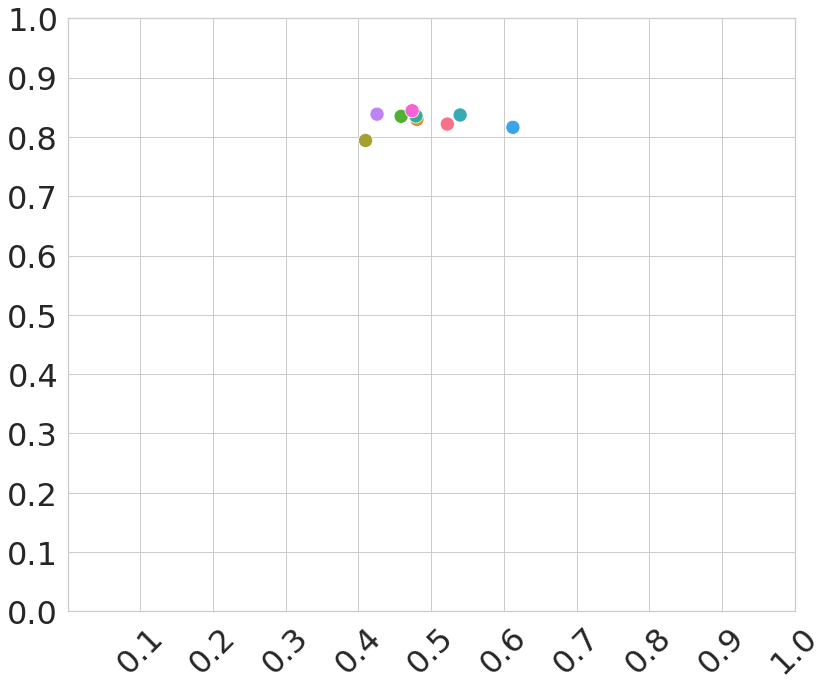

In [74]:
for subsample_fraction in [0.1, 0.2, 0.4, 0.8, 1.0]:
    print(subsample_fraction)
    df = results_df_cmpr[results_df_cmpr['subsample fraction'] == subsample_fraction]
    df = df.groupby(['subsample fraction', 'Architecture'], as_index=False).agg(
                      {'EBM':['mean','std'], 'KNN': ['mean', 'std']})
    df.columns = ['subsample fraction', 'Architecture', 'EBM_mean', 'EBM_std', 'KNN_mean', 'KNN_std']
    
    plt.close("all")
    plt.figure(figsize=(12, 10))
    sns.scatterplot(x='EBM_mean', y='KNN_mean', hue='Architecture', data=df,
                    legend=None, palette=sns.color_palette("husl", 9), s=200)
#     plt.legend(bbox_to_anchor=(1.05,0.5), borderaxespad=0, loc='center left', prop={'size': 18})
    plt.xlabel('', fontsize=22)
    plt.ylabel("", fontsize=22)
    plt.ylim(0, 1)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.xlim(0, 1)
    plt.xticks(np.arange(0.1, 1.1, 0.1), rotation=45)
    plt.tight_layout()
    os.makedirs(f"./results/subsample/{data_name}/scatter/", exist_ok=True)
    plt.savefig(f"./results/subsample/{data_name}/scatter/ebm_vs_knn_{subsample_fraction}.pdf", dpi=300)
    plt.show()

# Barplot 

<Figure size 864x720 with 0 Axes>

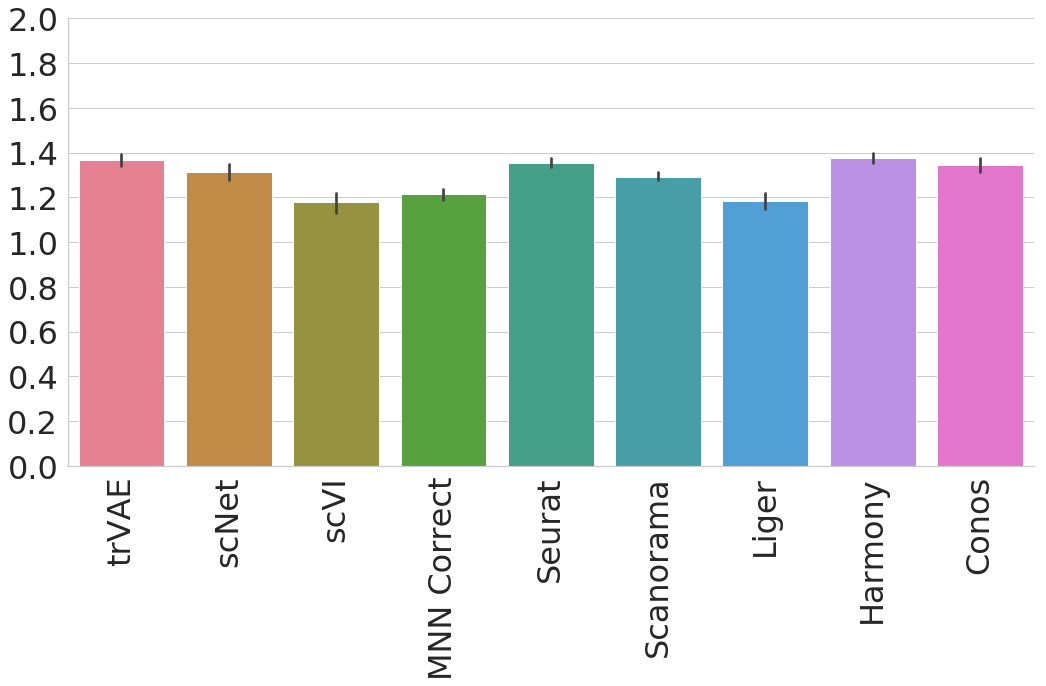

<Figure size 864x720 with 0 Axes>

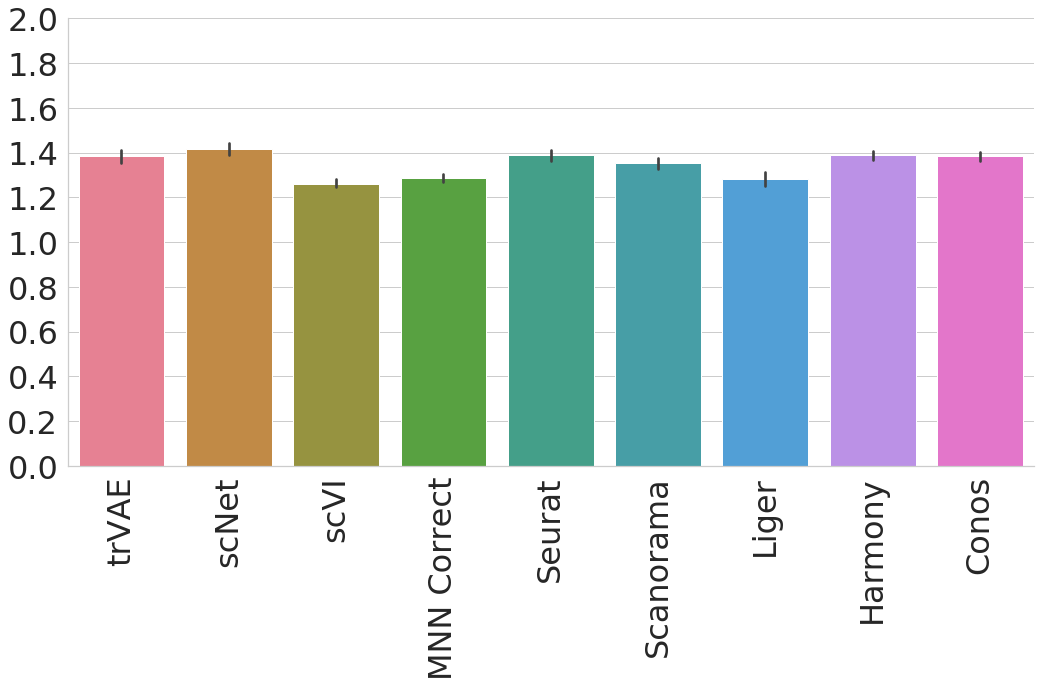

<Figure size 864x720 with 0 Axes>

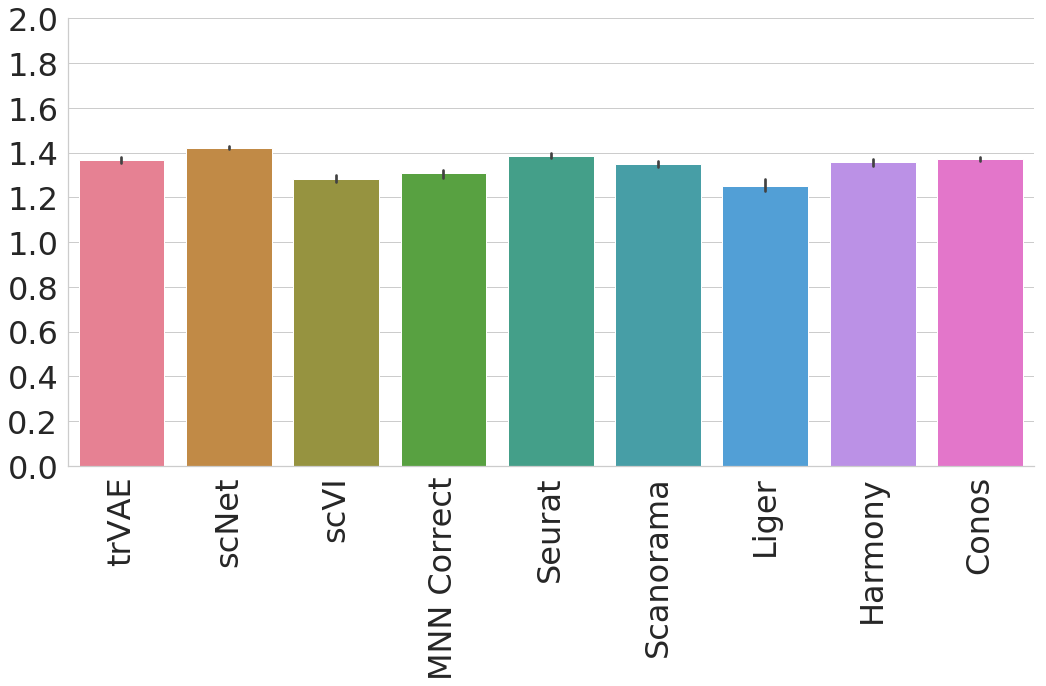

<Figure size 864x720 with 0 Axes>

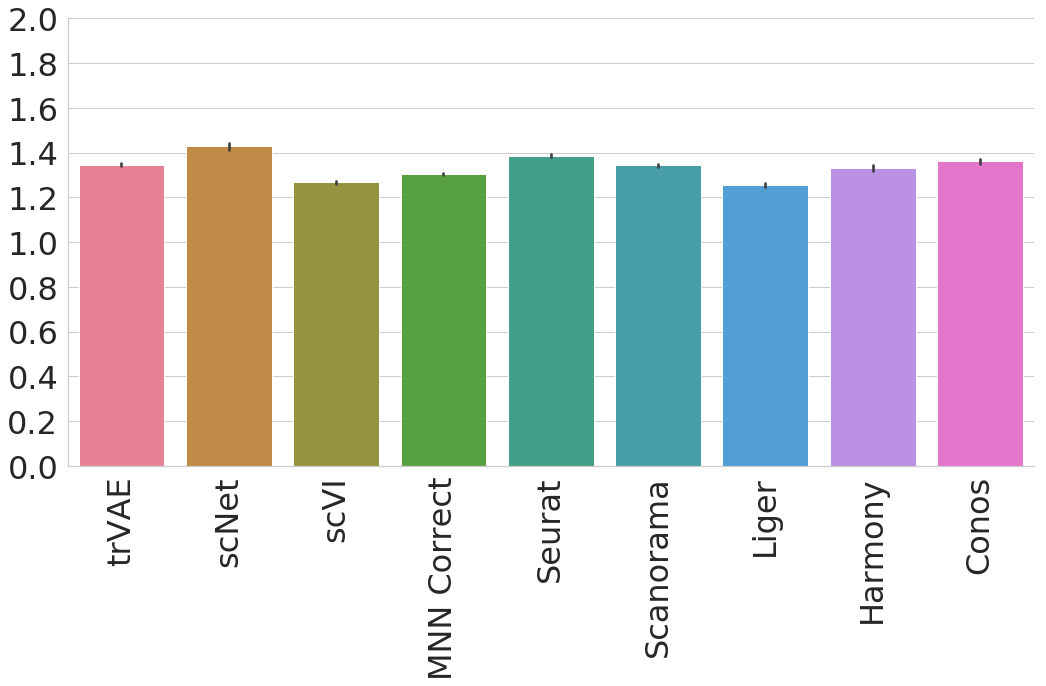

<Figure size 864x720 with 0 Axes>

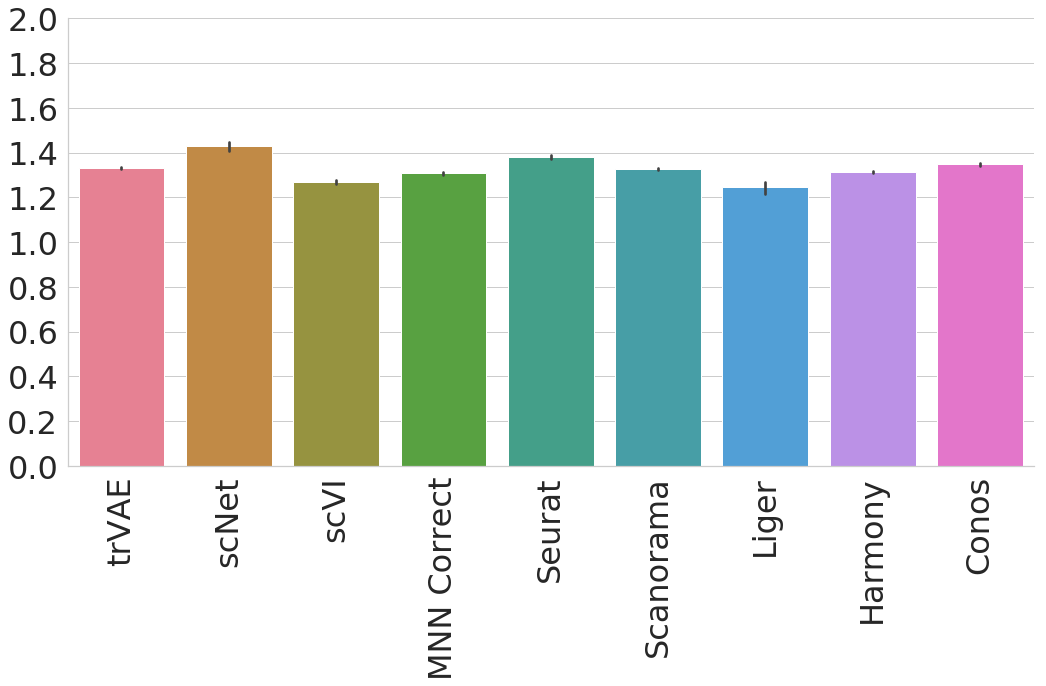

<Figure size 864x720 with 0 Axes>

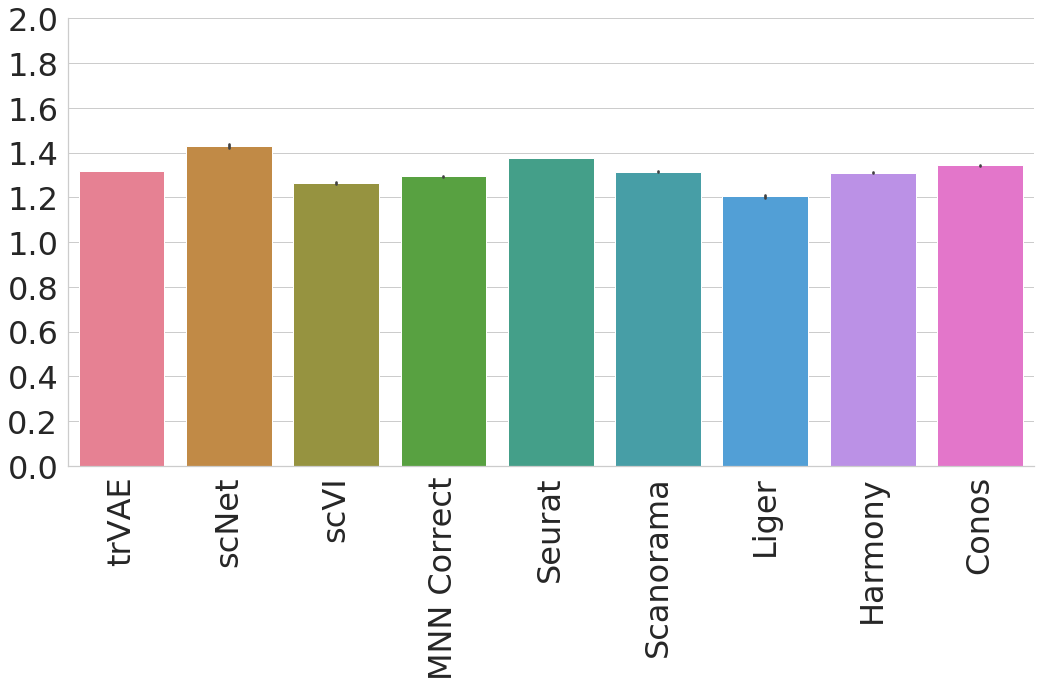

In [71]:
for subsample_fraction in [0.1, 0.2, 0.4, 0.6, 0.8, 1.0]:
    df = results_df_cmpr[results_df_cmpr['subsample fraction'] == subsample_fraction]
    plt.close("all")
    plt.figure(figsize=(12, 10))
    g = sns.catplot(x="Architecture", y="EBM+KNN", kind="bar", 
                    data=df, legend=False, height=10, aspect=1.5, 
                    palette=sns.color_palette("husl", 9))
    plt.xlabel('', fontsize=22)
    plt.ylabel("", fontsize=22)
    plt.ylim(0, 2)
    plt.yticks(np.arange(0, 2.2, 0.2))
    plt.xticks(rotation=90)
    plt.tight_layout()
    os.makedirs(f"./results/subsample/{data_name}/barplot/", exist_ok=True)
    plt.savefig(f"./results/subsample/{data_name}/barplot/ebm+knn_{subsample_fraction}.pdf", dpi=300)
    plt.show()